# Kernel-based Deblurring
### Imports
- We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
sys.path.append("..")

In [2]:
from neural_de.transformations import KernelDeblurringEnhancer
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 1.0, '(427, 640, 3)')

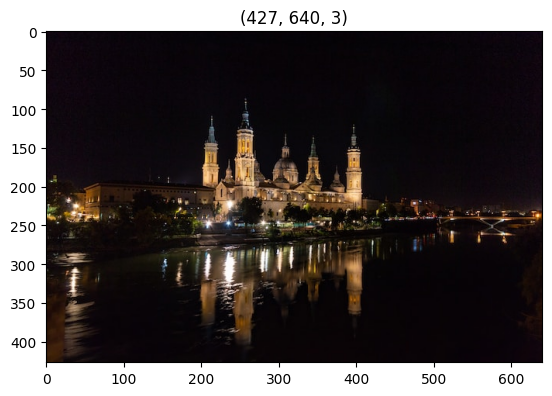

In [3]:
image_path = Path('../examples/images/night.jpg')
image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(image.shape)

# Let's deblur this images

- two kernels presets are provided : "high" and "medium"
- default value is "high"
- You can also use your own kernel

[11-06 10:54:58] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\utils\_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


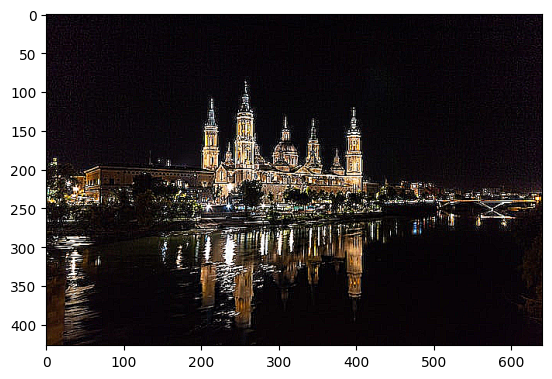

In [4]:
kerneldeblur = KernelDeblurringEnhancer()
purified = kerneldeblur.transform([image])
plt.imshow(purified[0])

- "medium" if "high" lead to an image to far from the original one

[11-06 10:55:09] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\utils\_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


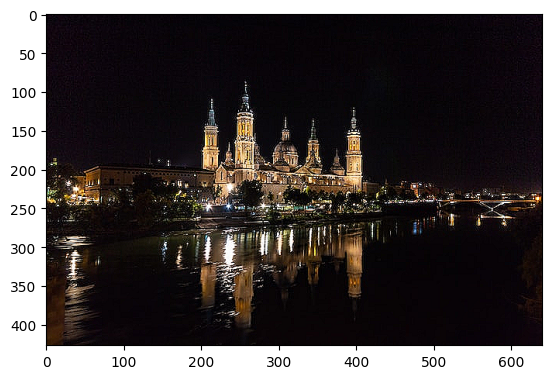

In [5]:
kerneldeblur = KernelDeblurringEnhancer(kernel="medium")
purified = kerneldeblur.transform([image])
plt.imshow(purified[0])

You can also provide your own kernel :
- it can be any 2D custom np.array.

Here is a custom kernel with effect between "medium" and "high" :

In [6]:
# "medium-high"
custom_kernel = np.array([[-0.5, -1, -0.5], [-1, 7, -1], [-0.5, -1, -0.5]])

[11-06 10:55:20] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\utils\_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[11-06 10:55:20] {C:\Users\marc.lacourt\PycharmProjects\neuralde\examples\..\neural_de\transformations\_kernel_deblurring_enhancer.py:45} INFO - Custom weights loaded


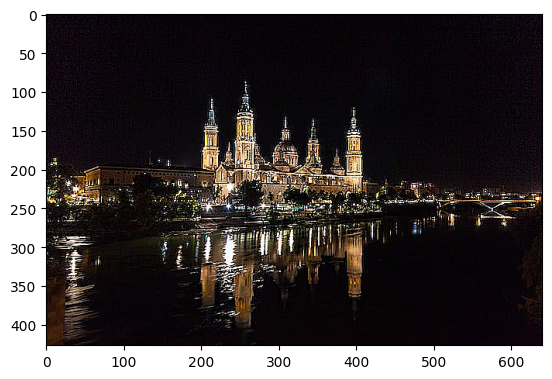

In [7]:
kerneldeblur = KernelDeblurringEnhancer(custom_kernel=custom_kernel)
purified = kerneldeblur.transform([image])
plt.imshow(purified[0])